### Team Info

This week's assignment is to:
1. Load a graph database of your choosing from a text file or other source. If you take a
large network dataset from the web (such as from https://snap.stanford.edu/data/), please
feel free at this point to load just a small subset of the nodes and edges.
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other
metric of your choosing. You may either code the functions by hand (to build your
intuition and insight), or use functions in an existing package.
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.
4. Please record a short video (~ 5 minutes), and submit a link to the video as part of your
homework submission. 

<hr>
<center> <h3> Guided Implementation </h3> </center>
<hr>

In [146]:
import os.path
import gzip
import csv
import networkx as nx
import urllib
import matplotlib.pyplot as plt

%matplotlib inline

### About Data Source 
We are going to read data from "https://snap.stanford.edu/data/" <br>
This dataset consists of 'circles' (or 'friends lists') from Facebook. Facebook data was collected from survey participants using this Facebook app. The dataset includes node features (profiles), circles, and ego networks. 
<table id="datatab" summary="Dataset statistics">
  <tbody><tr> <th colspan="2">Dataset statistics</th> </tr>
  <tr><td>Nodes</td> <td>4039</td></tr>
  <tr><td>Edges</td> <td>88234</td></tr>
  <tr><td>Nodes in largest WCC</td> <td>4039 (1.000)</td></tr>
  <tr><td>Edges in largest WCC</td> <td>88234 (1.000)</td></tr>
  <tr><td>Nodes in largest SCC</td> <td>4039 (1.000)</td></tr>
  <tr><td>Edges in largest SCC</td> <td>88234 (1.000)</td></tr>
  <tr><td>Average clustering coefficient</td> <td>0.6055</td></tr>
  <tr><td>Number of triangles</td> <td>1612010</td></tr>
  <tr><td>Fraction of closed triangles</td> <td>0.2647</td></tr>
  <tr><td>Diameter (longest shortest path)</td> <td>8</td></tr>
  <tr><td>90-percentile effective diameter</td> <td>4.7</td></tr>
</tbody></table>

### About Data format 
Edge List
The edge list is a simple data structure that you'll use to create the graph. Each row represents a single edge of the graph with some edge attributes. 
node1 & node2: names of the nodes connected.

This data is in the format of Edgelist which can be simply presented as Edges information in the flat file. Sample Example :
<table id="datatabEdgeList" summary="Edge List ">
  <tbody><tr> <th colspan="2">Edgelist for Facebook</th> </tr>
  <tr><th>Start from Nodes</th> <th> To Node</th></tr>
      <tr><td>0</td> <td>1</td></tr>
      <tr><td>0</td> <td>2</td></tr>
      <tr><td>0</td> <td>4</td></tr>
      <tr><td>0</td> <td>5</td></tr>
      <tr><td>1</td> <td>0</td></tr>
      <tr><td>2</td> <td>48</td></tr>
      <tr><td>2</td> <td>68</td></tr>
      <tr><td>1</td> <td>102</td></tr>
      <tr><td>2</td> <td>13</td></tr>
      <tr><td>2</td> <td>19</td></tr>
      <tr><td>2</td> <td>37</td></tr>
</tbody></table>



We will write methed to load the data by passing the Edgelist file. We are using netwrokx's `read_edgelist` method to read edgelist from facebook_combined.txt file. This function retrun <b> Graph object ('networkx.classes.graph.Graph') </b> which can be used to work regualr netwrokx graph object. 

In [158]:
def dataGraph(path):
    edgeGraph = nx.read_edgelist(path)
    
    return edgeGraph
    

In [159]:
# Setting the path for edgelist file from Facebook
facePath = 'data/facebook_combined.txt'
faceGraph  = dataGraph(facePath)
type (faceGraph)
print("Converted Graph's file type is: ", type(faceGraph))

Converted Graph's file type is:  <class 'networkx.classes.graph.Graph'>


`nx.info(G)` method returns the graph info, which can be very well check against the file property from soruce `https://snap.stanford.edu/data/ego-Facebook.html`.

In [25]:
print( nx.info(faceGraph))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


Here we are saying that its Graph type of Object , and 
Number of Nodes in the Graph = 4039, with total number of edges = 88234 , and Average degree of the graph ~ 44 . 
>This indicates that in the graph data collected on avergare we have ~43 frinds for each user. 

In [36]:
# We can user simple method to check the same info
nx.number_of_edges(faceGraph)

88234

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


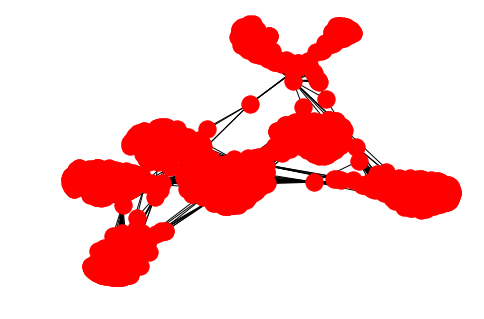

In [35]:
# Would take 5 min to Run 
nx.draw(faceGraph)
plt.show()

Since the graph is so dense its not making much sense, but we can see there are close to 8 very compact group in the netwrok of facebook with very few nodes in between the group. 

In [37]:
# calcualte the Diameter of the Graph

nx.diameter(faceGraph)

8

In [85]:
# We will read all the Degrees in the varaible faceDegree 
faceDegree = nx.degree(faceGraph)
type(faceDegree)

networkx.classes.reportviews.DegreeView

Degree refers to the number of edges incident to (touching) a node. Nodes are referred to as odd-degree nodes when this number is odd and even-degree when even.


In [63]:
min(faceDegree)  # Get the Minimum Degree of the Node 

('0', 347)

In [66]:
faceDegree['0'] # Check from Nodes the Degree 

347

In [65]:
max(faceDegree)  # Get the Maximum Degree of the Node 

('999', 77)

In [68]:
faceDegree['999']  # Check from Nodes the Degree 

77

In [336]:
# Convert the Degree ouput to List
faceLDegree = list(nx.degree(faceGraph))
type(faceLDegree)


('0', 347)

Degree of Distribution is the how many Degrees are in the given nodes. Above we create a `faceDegree` dictionary which hold the Node and Degree of the nodes in the key value pair. 

Degree distribution is the number of Degree and nodes representation 
 <br>   No.Of Node | Degree <br>
        4    | 10<br>
        8    | 10<br>
        4    | 10<br>

In [125]:
import pandas as pd



In [127]:
pdEdgeList = pd.read_csv(facePath, sep=" ", header=None)
pdEdgeList.head(5)

,0,1
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Loop through the rows of the edge list and add each edge a graph gpd.

In [177]:
gpd = nx.Graph()
type(gpd)

networkx.classes.graph.Graph

In [178]:
# Add edgeslist to Graph
for i, elrow in pdEdgeList.iterrows():
    gpd.add_edge(elrow[0], elrow[1])
    
    


In [209]:
print(nx.info(gpd))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [256]:
faceGraph.order() ,  faceGraph.size()

(4039, 88234)

In [259]:
N,K = faceGraph.order(), faceGraph.size() 
avg_deg = float(K)/N 
avg_deg

21.84550631344392

In [295]:
min(degree)

1

In [296]:
max(degree)

1045

faceGraph.order() ,  faceGraph.size()

The starting graph is undirected. That is, your edges have no orientation: they are bi-directional. For example: A<--->B == B<--->A.

In [187]:
nx.is_directed(gpd)


4039

In [328]:
# Function to Calcuate Degree of the Graph

def calcualte_degree(G,n = 0):
    fmdegree = []
    for node in G.nodes():
        tempD = G.degree(node)
        if tempD > n : fmdegree.append(tempD )
    return fmdegree
            




In [335]:
df = pd.DataFrame(L, columns='columns')

TypeError: 'list' object is not callable

In [322]:
gpdDegree = calcualte_degree(gpd,0)

gpdDegree

[347,
 17,
 10,
 17,
 10,
 13,
 6,
 20,
 8,
 57,
 10,
 1,
 1,
 31,
 15,
 1,
 9,
 13,
 1,
 16,
 15,
 65,
 11,
 17,
 16,
 69,
 68,
 5,
 13,
 13,
 17,
 23,
 6,
 2,
 5,
 2,
 11,
 1,
 9,
 15,
 44,
 24,
 2,
 1,
 6,
 12,
 5,
 2,
 22,
 4,
 11,
 7,
 2,
 31,
 8,
 17,
 78,
 15,
 12,
 19,
 8,
 3,
 26,
 6,
 7,
 12,
 15,
 76,
 9,
 10,
 2,
 3,
 24,
 10,
 1,
 14,
 3,
 6,
 9,
 12,
 23,
 3,
 34,
 7,
 13,
 14,
 6,
 13,
 20,
 8,
 2,
 8,
 21,
 8,
 22,
 6,
 9,
 3,
 49,
 13,
 9,
 19,
 6,
 16,
 32,
 14,
 8,
 1045,
 13,
 37,
 5,
 14,
 3,
 40,
 1,
 21,
 17,
 6,
 36,
 62,
 4,
 12,
 63,
 18,
 4,
 4,
 7,
 16,
 28,
 7,
 16,
 7,
 16,
 18,
 19,
 10,
 133,
 16,
 2,
 9,
 11,
 28,
 43,
 12,
 15,
 2,
 10,
 6,
 20,
 14,
 11,
 7,
 5,
 2,
 2,
 3,
 12,
 3,
 25,
 14,
 2,
 25,
 8,
 6,
 3,
 11,
 4,
 7,
 11,
 38,
 46,
 22,
 41,
 12,
 4,
 17,
 14,
 11,
 13,
 3,
 20,
 10,
 3,
 2,
 18,
 26,
 44,
 16,
 48,
 7,
 4,
 3,
 5,
 5,
 19,
 9,
 13,
 16,
 12,
 47,
 57,
 4,
 4,
 57,
 22,
 2,
 4,
 3,
 7,
 1,
 1,
 30,
 18,
 39,
 17,
 1,
 2,
 8,


In [281]:
len(degree)

4039

In [293]:
degreeNew = degree

mylist = list(set(degree))
mylist


[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 1045,
 26,
 25,
 28,
 27,
 30,
 31,
 32,
 29,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 33,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 42,
 51,
 52,
 50,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 1